In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd 'gdrive/MyDrive/NLP Project/Round 2'

/content/gdrive/MyDrive/NLP Project/Round 2


In [3]:
%pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 5.4 MB/s 
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.3
    Uninstalling spacy-3.4.3:
      Successfully uninstalled spacy-3.4.3


In [5]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-16 08:55:29.215168: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
%pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [7]:
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import FreqDist, pos_tag
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import numpy as np
from nltk.corpus import wordnet as wn
from collections import Counter
import spacy
from spacy import displacy
from collections import Counter
import pandas as pd

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [8]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
book_used = 1

## Reading the book

In [11]:
lines = ""
with open(f'book{book_used}.txt') as f:
    lines = f.readlines()
text = ""
for line in lines:
  text += line

## Simple preprocessing
This includes:
- Removing ASCII Characters (Removing images, emojis, etc)
- Removing chapter names
- Removing running sections
- Removing page numbers
- Removing subtext of figures
- Removing punctuations
- Removing new lines
- Removing extra spaces
- Converting text to lowercase

In [12]:
text = re.sub(r'[^\x00-\x7f]', " ", text)# Removing non-ASCII characters
text = re.sub( "\n[0-9]+\n" , "", text)# Removing page numbers
text = re.sub( "\nCHAP. [0-9]+\n" , "", text)# Removing 'CHAP. 1' like words
text = re.sub( "\nSEC. [0-9]+.[0-9]+\n" , "", text)# Removing 'SEC. 1.1' like words
text = re.sub( "[Ff]ig.[ ][0-9]+-[0-9]+" , "", text)# Removing 'Fig.' keyword
text = re.sub( "[Ff]igure[ ][0-9]+-[0-9]+" , "", text)# Removing 'Fig Figure' keyword
text = re.sub( "\n" , " ", text)# Removing linebreak
text = re.sub("""[^\w\s]""", " ", text)# Removing all punctuation marks

text = ' '.join(text.split()) # Removing extra spaces

# Converting all characters to lower case
text2 = ""

for char in text:
    text2 += char.lower()

## Saving the preprocessed book

In [13]:
with open(f'book{book_used}simpleProcessed_1.txt', 'w') as f:
    f.write(text2)
with open(f'book{book_used}simpleProcessed_11.txt', 'w') as f:
    f.write(text)

In [14]:
lines2 = ""
with open(f'book{book_used}simpleProcessed_11.txt') as f:
    lines2 = f.readlines()
data2 = ""
for line in lines2:
  data2 += line

In [15]:
lines = ""
with open(f'book{book_used}simpleProcessed_1.txt') as f:
    lines = f.readlines()
data = ""
for line in lines:
  data += line

## Tokenize the text

In [16]:
data_token = word_tokenize(data)
data_token2 = word_tokenize(data2)

## Removal of stopwords from the text

In [17]:
stop_words = stopwords.words('english')
data_stopwords_token = [word for word in data_token if not word in stop_words]
data_stopwords = " ".join(data_stopwords_token)
data_stopwords_token2 = [word for word in data_token2 if not word in stop_words]
data_stopwords2 = " ".join(data_stopwords_token2)

## Saving the book without stopwords

In [18]:
with open(f'book{book_used}simpleProcessed_2.txt', 'w') as f:
    f.write(data_stopwords)

with open(f'book{book_used}simpleProcessed_21.txt', 'w') as f:
    f.write(data_stopwords2)

## POS Tagging of the text

In [19]:
data_tag = pos_tag(data_stopwords_token)

## Print:
- Total number of tokens
- Number of "Noun" tagged tokens
- Number of "Verb" tagged tokens

In [20]:
print(len(data_stopwords_token))
nouns11=[token for token,pos in pos_tag((data_stopwords_token)) if pos.startswith('N')]
print(len(nouns11))
verb11=[token for token,pos in pos_tag((data_stopwords_token)) if pos.startswith('V')]
print(len(verb11))

246809
117326
46227


## Syntatic Labelling of the text

In [21]:
def synset(words):
    categories=[]
    for word in words:
        cat=[]
        for synset in wn.synsets(word):
            if('noun' in synset.lexname()):
                cat.append(synset.lexname())
            if ('verb' in synset.lexname()):
                cat.append(synset.lexname())
        categories.append(cat)
    return categories

In [22]:
def all_synsets (no,ve):
    nouns=[]
    verbs=[]
    for word in no:
        for synset in wn.synsets (word):
            if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
                nouns.append(synset.lexname())
            if('verb' in synset.lexname()):
                verbs.append(synset.lexname())
    for word in ve:
        for synset in wn.synsets (word):
            if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
                nouns.append(synset.lexname())
            if('verb' in synset.lexname()):
                verbs.append(synset.lexname())

    return nouns, verbs

In [23]:
noun_syn,verb_syn=all_synsets(nouns11,verb11)

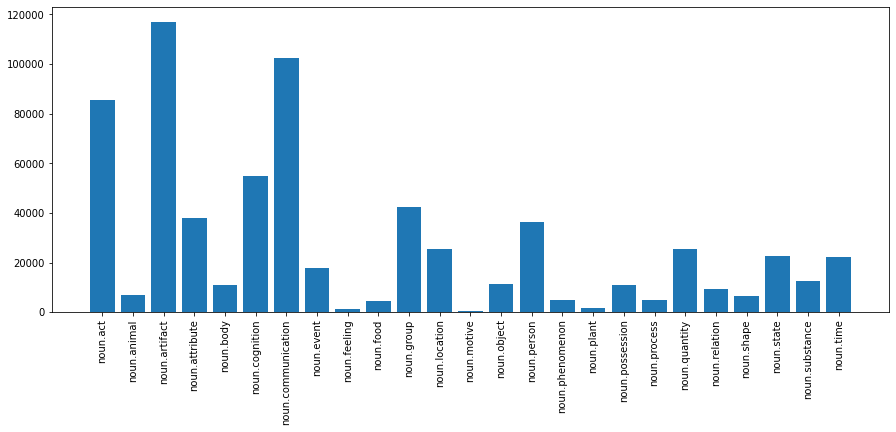

In [24]:
labels_n, counts_n= np.unique (noun_syn, return_counts=True)
ticks =range(len(counts_n))
plt.figure(figsize=(15,8))
plt.bar(labels_n, counts_n, align='center')
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom = 0.35)
plt.show()

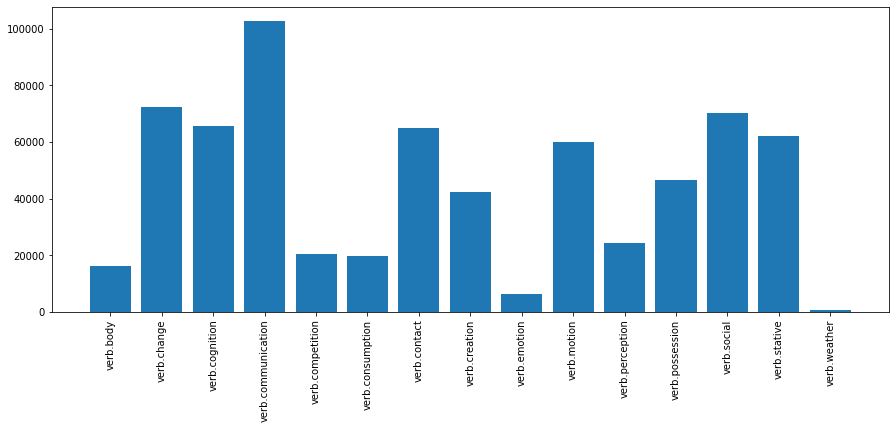

In [25]:
labels_v, counts_v = np.unique (verb_syn, return_counts=True)
ticks1 =range(len(counts_v))
plt.figure(figsize=(15,8))
plt.bar(labels_v, counts_v, align='center')
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom = 0.35)
plt.show()

## Entity Recognition

In [26]:
nlp = spacy.load("en_core_web_sm")
doc1= nlp(data_stopwords[:50000])
print(f"{str(len(doc1.ents))} entities exists in book{book_used}")

738 entities exists in book1


In [27]:
def entity_recognition(text):
    doc=nlp(text)
    person=[]
    org=[]
    location=[]
    for X in doc:
        if (X.ent_type_ == 'PERSON') and X.text not in person:
            person.append(X.text)
        if (X.ent_type_=='ORG') and X.text not in org:
            org.append(X.text)
        if ((X.ent_type_ =='LOC') or (X.ent_type_== 'CPE')) and X. text not in location:
            location.append(X.text)
    return person, org, location

In [28]:
person1,org1, location1=entity_recognition (data_stopwords[:50000])

print(f"Number of \"person\" entities in book{book_used} = {str(len(person1))}")
print(f"Number of \"organization\" entities in book{book_used} = {str(len(org1))}")
print(f"Number of \"location\" entities in book{book_used} = {str(len(location1))}")
print("\nOrganizations: ")
for i, org in enumerate(org1):
  print(f"{i+1} -> {org}", end="; ")

Number of "person" entities in book1 = 101
Number of "organization" entities in book1 = 93
Number of "location" entities in book1 = 0

Organizations: 
1 -> prentice; 2 -> hall; 3 -> boston; 4 -> columbus; 5 -> tapei; 6 -> tokyo; 7 -> pearson; 8 -> education; 9 -> inc; 10 -> publishing; 11 -> rights; 12 -> reserved; 13 -> united; 14 -> states; 15 -> america; 16 -> permissions; 17 -> department; 18 -> boylston; 19 -> street; 20 -> suite; 21 -> congress; 22 -> dc2210; 23 -> coco1; 24 -> antenna; 25 -> television; 26 -> versus; 27 -> asymmetric; 28 -> digital; 29 -> subscriber; 30 -> epc; 31 -> virtual; 32 -> circuit; 33 -> datagram; 34 -> xiv; 35 -> dns; 36 -> xvii; 37 -> 9; 38 -> 1; 39 -> fth; 40 -> university; 41 -> washington; 42 -> aes; 43 -> ajax; 44 -> aodv; 45 -> iptv; 46 -> irtf; 47 -> iso; 48 -> yoris; 49 -> au; 50 -> bhargava; 51 -> aircom; 52 -> international; 53 -> michael; 54 -> buettner; 55 -> john; 56 -> day; 57 -> kevin; 58 -> fall; 59 -> intel; 60 -> ronald; 61 -> fulle; 

In [29]:
def freq(str_list):
    unique_words =set(str_list)
    counts= {}
    for words in unique_words :
        counts[words]= str_list.count(words)
    return counts

In [30]:
X=freq(person1)
print(sorted(X.items(), key =lambda kv: (kv[1], kv[0]), reverse=True))
X=freq(location1)
print(sorted(X.items(), key =lambda kv: (kv[1], kv[0]), reverse=True))

[('yezan', 1), ('xx', 1), ('xml', 1), ('wdm', 1), ('wan', 1), ('university', 1), ('turner', 1), ('tracy', 1), ('teneyuca', 1), ('tanenbaum', 1), ('tagging', 1), ('tadayoshi', 1), ('svendsen', 1), ('susan', 1), ('steve', 1), ('stephen', 1), ('soap', 1), ('snr', 1), ('smith', 1), ('shivakant', 1), ('sandin', 1), ('ruddick', 1), ('rtsp', 1), ('rsa', 1), ('rpc', 1), ('rfid', 1), ('rachel', 1), ('phoenix', 1), ('pearson', 1), ('paul', 1), ('partridge', 1), ('paradise', 1), ('nagin', 1), ('michael', 1), ('memory', 1), ('melinda', 1), ('mcdowell', 1), ('matilde', 1), ('marvin', 1), ('marcia', 1), ('lucy', 1), ('lisa', 1), ('linda', 1), ('levy', 1), ('letourneau', 1), ('lehigh', 1), ('lata', 1), ('lan', 1), ('kohno', 1), ('know', 1), ('kinicki', 1), ('katrin', 1), ('kathryn', 1), ('kadenko', 1), ('jvm', 1), ('julie', 1), ('juang', 1), ('jsp', 1), ('jpeg', 1), ('joshua', 1), ('joe', 1), ('jeff', 1), ('jason', 1), ('jack', 1), ('itu', 1), ('intel', 1), ('ii', 1), ('hotel', 1), ('horton', 1), ('h

## Performance Evaluation

In [192]:
selText1= "Tadayoshi's Virtual worlds provide a persistent setting in which thousands of users can experience a shared reality with three dimensional graphics"
selText2="Ajay will not pay a ₹50 premium for an Internet thermostat because few people regard monitoring their home temperature from work that important"

In [193]:
selLabel1=['PERSON', 'O', 'WORK_OF_ART', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'CARDINAL', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'CARDINAL', 'O', 'O']
selLabel2=['PERSON', 'O', 'O', 'O', 'O', 'O', 'MONEY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

In [194]:
print(len(word_tokenize(selText1)))
print(len(selLabel1))
print(len(word_tokenize(selText2)))
print(len(selLabel2))

22
22
23
24


In [195]:
doc1 = nlp(selText1)
predLabel1= [word.ent_type_ for word in doc1]

In [196]:
print(len(selLabel1))
print(len(predLabel1))
print(predLabel1)


22
22
['ORG', '', 'WORK_OF_ART', '', '', '', '', '', '', '', 'CARDINAL', '', '', '', '', '', '', '', '', 'CARDINAL', '', '']


In [197]:
doc2 = nlp(selText2)
predLabel2= [word.ent_type_ for word in doc2]

In [198]:
print(len(selLabel2))
print(len(predLabel2))
print(predLabel2)

24
24
['ORG', '', '', '', '', '', 'MONEY', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


In [199]:
predLabelFinal1 = predLabel1.copy()
for x in range(len(predLabel1)):
    if (predLabel1[x]=='') or (predLabel1[x] not in ['ORG', 'WORK_OF_ART', 'MONEY', 'PERSON', 'CARDINAL']):
        predLabelFinal1[x] = 'O'

In [200]:
print(predLabelFinal1)

['ORG', 'O', 'WORK_OF_ART', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'CARDINAL', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'CARDINAL', 'O', 'O']


In [212]:
predLabelFinal2 = predLabel2.copy()
for x in range(len(predLabel2)):
    if (predLabel2[x]=='') or (predLabel2[x] not in ['ORG', 'WORK_OF_ART', 'MONEY', 'PERSON', 'CARDINAL']):
        predLabelFinal2[x] = 'O'

In [213]:
print(predLabelFinal2)

['ORG', 'O', 'O', 'O', 'O', 'O', 'MONEY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [214]:
confusionMatrix = {"TP":0, "TN":0, "FP":0, "FN":0}
for i, trueLabel in enumerate(selLabel1):
  if ((trueLabel == 'O') and (predLabelFinal1[i] == trueLabel)):
    confusionMatrix["TN"] += 1
  if ((trueLabel == 'O') and (predLabelFinal1[i] != 'O') and (predLabelFinal1[i] != trueLabel)):
    confusionMatrix["FP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal1[i] == trueLabel)):
    confusionMatrix["TP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal1[i] == 'O')) or ((trueLabel != 'O') and (predLabelFinal1[i] != 'O') and (predLabelFinal1[i] != trueLabel)):
    confusionMatrix["FN"] += 1

In [215]:
for i, trueLabel in enumerate(selLabel2):
  if ((trueLabel == 'O') and (predLabelFinal2[i] == trueLabel)):
    confusionMatrix["TN"] += 1
  if ((trueLabel == 'O') and (predLabelFinal2[i] != 'O') and (predLabelFinal2[i] != trueLabel)):
    confusionMatrix["FP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal2[i] == trueLabel)):
    confusionMatrix["TP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal2[i] == 'O')) or ((trueLabel != 'O') and (predLabelFinal2[i] != 'O') and (predLabelFinal2[i] != trueLabel)):
    confusionMatrix["FN"] += 1

In [216]:
print(confusionMatrix)

{'TP': 4, 'TN': 40, 'FP': 0, 'FN': 2}


In [217]:
accuracy = (confusionMatrix["TP"]+confusionMatrix["TN"])/(confusionMatrix["TP"]+confusionMatrix["TN"]+confusionMatrix["FP"]+confusionMatrix["FN"])

In [218]:
recall = (confusionMatrix["TP"])/(confusionMatrix["TP"]+confusionMatrix["FN"])

In [219]:
precission = (confusionMatrix["TP"])/(confusionMatrix["TP"]+confusionMatrix["FP"])

In [220]:
f1_score = (2*recall*precission)/(recall+precission)

In [221]:
print(accuracy)
print(recall)
print(precission)
print(f1_score)

0.9565217391304348
0.6666666666666666
1.0
0.8


In [222]:
doc2= nlp(data_stopwords2[:50000])
featureMat = []
for token in doc2:
    if(token.ent_type_!=""):
        featureMat.append([token.text, token.lemma_, token.tag_, token.shape_, token.is_alpha, token.ent_iob_, token.ent_type_])
  
    

In [223]:
df = pd.DataFrame(featureMat, columns =["Text", "Lemma", "POS Tag", "Shape", "Is Alpha", "Entity IOB", "Entity Type"])

In [224]:
df.head(100)

,Text,Lemma,POS Tag,Shape,Is Alpha,Entity IOB,Entity Type
0,Amsterdam,Amsterdam,NNP,Xxxxx,True,B,GPE
1,WETHERALL,WETHERALL,NNP,XXXX,True,B,ORG
2,University,University,NNP,Xxxxx,True,I,ORG
3,Washington,Washington,NNP,Xxxxx,True,B,GPE
4,Seattle,Seattle,NNP,Xxxxx,True,B,GPE
...,...,...,...,...,...,...,...
95,TK5105,TK5105,NNP,XXdddd,False,I,LAW
96,5,5,CD,d,False,I,LAW
97,T36,T36,NNP,Xdd,False,I,LAW
98,2011,2011,CD,dddd,False,B,CARDINAL
